"""<br>
@Author: Prayag Bhoir<br>
@Date: 08-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 08-10-2024<br>
@Title : Python programs on Nural network(DL) Based on bank customer data, predicted whether cutomer will subscribe to term deposit or not.<br>
"""

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Load the dataset </h2>

In [83]:
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn'
df = pd.read_csv(url,delimiter=';',header=0)
#check the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [84]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<h2>Preprocess the data</h2>

In [86]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})# Can use label encoding

In [87]:
#check the data
df['y'].tail(10)

,y
4511,1
4512,0
4513,0
4514,0
4515,0
4516,0
4517,0
4518,0
4519,0
4520,0


In [88]:
# Label encoding for 'education', 'default', 'housing', 'loan' as its ordinal
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])

In [89]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,1,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,2,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,2,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,1,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,1,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,2,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,1,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,1,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [90]:
# One-hot encoding for other categorical variables as its nominal
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'month', 'poutcome'], drop_first=True)

In [91]:
df_encoded.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0,1787,0,0,19,79,1,-1,...,False,False,False,False,False,True,False,False,False,True
1,33,1,0,4789,1,1,11,220,1,339,...,False,False,False,True,False,False,False,False,False,False
2,35,2,0,1350,1,0,16,185,1,330,...,False,False,False,False,False,False,False,False,False,False
3,30,2,0,1476,1,1,3,199,4,-1,...,False,True,False,False,False,False,False,False,False,True
4,59,1,0,0,1,0,5,226,1,-1,...,False,False,False,True,False,False,False,False,False,True


In [92]:
# Convert true false to 0/1 - cause its require in Ml
df_encoded = df_encoded.astype(int)

In [93]:
df_encoded.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0,1787,0,0,19,79,1,-1,...,0,0,0,0,0,1,0,0,0,1
1,33,1,0,4789,1,1,11,220,1,339,...,0,0,0,1,0,0,0,0,0,0
2,35,2,0,1350,1,0,16,185,1,330,...,0,0,0,0,0,0,0,0,0,0
3,30,2,0,1476,1,1,3,199,4,-1,...,0,1,0,0,0,0,0,0,0,1
4,59,1,0,0,1,0,5,226,1,-1,...,0,0,0,1,0,0,0,0,0,1


<h2>Check the outliers and correlation</h2>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

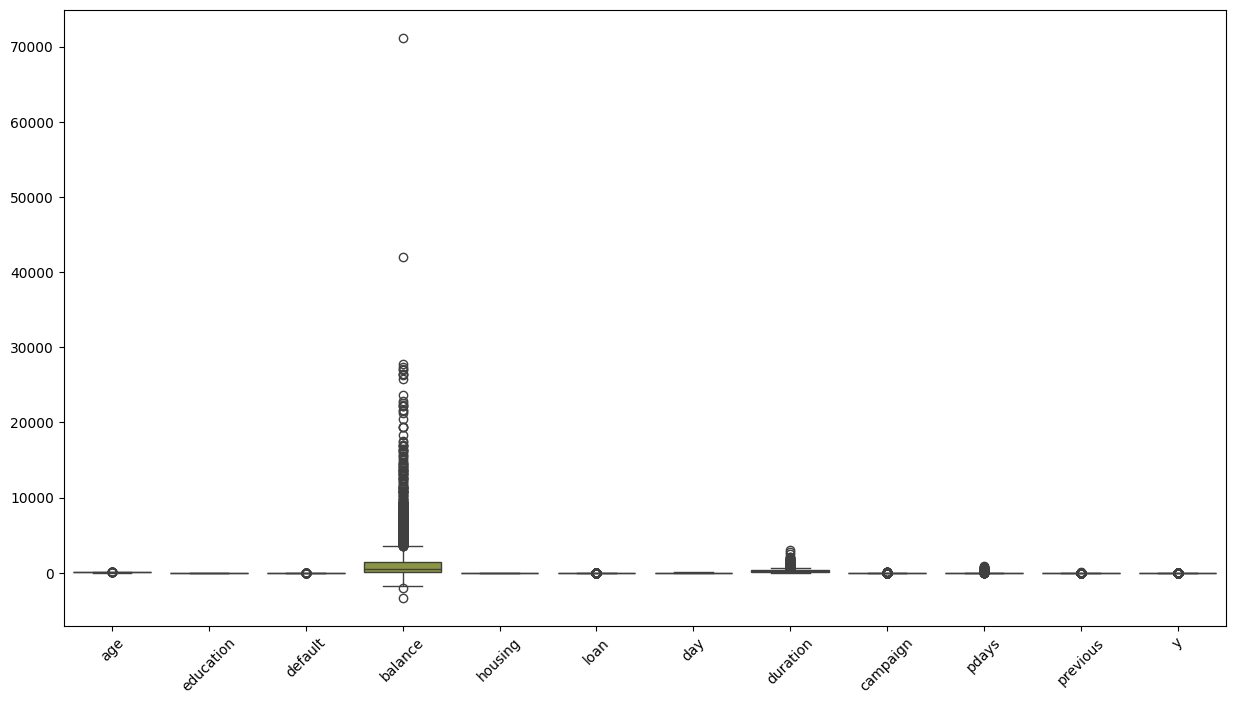

In [94]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
	<li>There are outliers present in the features</li>


<Axes: >

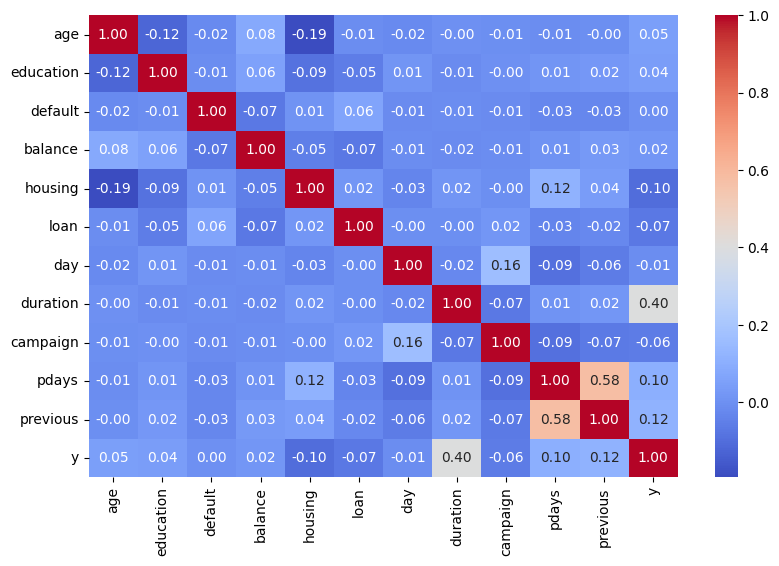

In [95]:
plt.figure(figsize=(9.5,6))
# For numerical value data
sns.heatmap(df[df.describe().columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')

<h2>Observations</h2>
	<li>The orange and redesh shades has high correlation with the y</li>


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


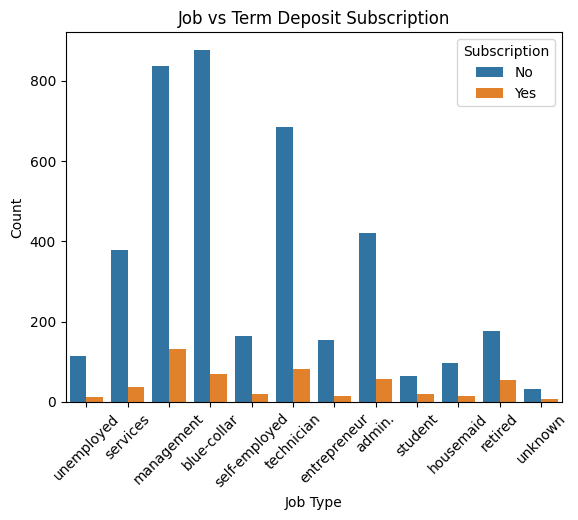

In [96]:
# Bar plot for 'job' vs 'y'
sns.countplot(data=df, x='job', hue='y')
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


<h2>Saperate the features</h2>


In [97]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
#Check the data
X.head(),y.head()

(   age  education  default  balance  housing  loan  day  duration  campaign  \
 0   30          0        0     1787        0     0   19        79         1   
 1   33          1        0     4789        1     1   11       220         1   
 2   35          2        0     1350        1     0   16       185         1   
 3   30          2        0     1476        1     1    3       199         4   
 4   59          1        0        0        1     0    5       226         1   
 
    pdays  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
 0     -1  ...          0          0          0          0          0   
 1    339  ...          0          0          0          1          0   
 2    330  ...          0          0          0          0          0   
 3     -1  ...          0          1          0          0          0   
 4     -1  ...          0          0          0          1          0   
 
    month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  

<h2>Split the dataset into training and testing</h2>


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
display(X_test)
display(y_test)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2398,51,1,1,-2082,0,1,28,123,6,-1,...,1,0,0,0,0,0,0,0,0,1
800,50,2,0,2881,0,0,5,510,2,2,...,0,0,0,0,0,0,0,1,0,0
2288,50,1,0,1412,0,0,6,131,3,-1,...,0,0,0,0,0,0,0,0,0,1
2344,37,2,0,0,1,0,3,247,13,-1,...,0,1,0,0,0,0,0,0,0,1
3615,31,1,0,757,0,0,3,343,2,-1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,38,3,0,3576,0,0,25,349,2,183,...,0,0,0,0,1,0,0,0,1,0
3128,57,0,1,195,0,1,30,185,4,-1,...,1,0,0,0,0,0,0,0,0,1
3259,52,1,0,428,1,0,30,153,1,-1,...,0,0,0,1,0,0,0,0,0,1
4239,31,1,0,2305,0,0,4,139,1,-1,...,0,0,0,0,0,0,0,0,0,1


,y
2398,0
800,0
2288,0
2344,0
3615,0
...,...
3589,1
3128,0
3259,0
4239,0


<h2>Build the model</h2>

In [100]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_dim=X_train.shape[1]))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7184 - loss: 54.3923
Epoch 2/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7961 - loss: 14.1459
Epoch 3/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8647 - loss: 0.6554
Epoch 4/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.7587
Epoch 5/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8710 - loss: 0.4240
Epoch 6/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8666 - loss: 0.5474
Epoch 7/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8770 - loss: 0.4242
Epoch 8/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8713 - loss: 0.4224
Epoch 9/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8892 - loss: 0.4064
Epoch 10/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8753 - loss: 0.3763
Epoch 11/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8857 - loss: 0.4828
Epoch 12/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accura

In [102]:

y_pred = model.predict(X_test)
# Step 8: Convert probabilities to binary outcomes (1 for Exited, 0 for Not Exited)
y_pred = (y_pred > 0.5).astype(int)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<h2>Evaluating the model</h2>

In [103]:
loss, accuracy = model.evaluate(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8708 - loss: 0.3892 


In [104]:
print(f'Accuracy: {accuracy*100:.2f}%')
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Accuracy: 87.96%
Confusion Matrix:
 [[774  33]
 [ 76  22]]
Accuracy: 0.8795580110497238


<h2>Check the prediction<h2>

In [105]:
X_test.iloc[0:1,:]

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2398,51,1,1,-2082,0,1,28,123,6,-1,...,1,0,0,0,0,0,0,0,0,1


In [106]:
# Predict whether the client will subscribe to the term deposit
prediction = model.predict(X_test.iloc[0:1,:])

# Since it's a binary classification, convert the probability to a binary outcome
predicted_label = (prediction > 0.5).astype(int)

if predicted_label == 1:
    print("Predicted: Yes, the client will subscribe to a term deposit.")
else:
    print("Predicted: No, the client will not subscribe to a term deposit.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: No, the client will not subscribe to a term deposit.


<h2>Observations</h2>
	<li>The prediction is correct</li>
